<a href="https://colab.research.google.com/github/jinsusong/study-NLP-IEEE-Paper/blob/main/Irony_Detection_Using_Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Irony Detection Using Transformers

# Abstract

지속적으로 확장되는 소셜 네트워크와 함께 아이러니 감지 및 분류의 사용 사례도 기하급수적으로 증가하고 있습니다. 이 작업을 통해 SemEva1-2018의 Task3을 두 가지 작업이 더 있는 문제 설명으로 사용합니다. 우리는 먼저 주어진 트윗이 아이러니한지 아닌지(작업 A) 결정한 다음 트윗을 네 가지 클래스로 분류할 것입니다. 비아이러니, 대조가 있는 언어적 아이러니, 대조가 없는 언어적 아이러니 및 상황적 아이러니(작업 B). 기존 논문들은 주로 지도학습(supervised machine learning)을 사용하여 트윗의 어휘적 특징을 이용했다. 여기에서 우리는 두 가지 NLP Transformer 모델을 제안했습니다. BERT(Bidirectional Encoder Representations from Transformers) 및 XLNets를 사용하여 트윗을 분류하고 우리의 결과를 과거 논문의 결과와 비교했습니다. BERT를 사용하여 0.70 및 0.75의 F1 점수와 XLNets 0.74 및 0을 사용하여 달성했습니다.

#Introduction

소셜 네트워크의 발전은 공개 게시물에서 냉소적이고 아이러니한 표현의 사용을 촉진했습니다. 이것은 간결하고 효과적이며 매력적인 방식으로 자신의 견해를 제시하기 위해 수행됩니다. 시간이 지남에 따라 아이러니 감지 및 분류는 감정 분석, 온라인 괴롭힘 감지, 작성자 프로파일링, 누군가의 견해 기록 및 분석과 같은 실제 시나리오에서 많은 사용 사례를 발견했습니다.

여기서 우리의 임무는 SemEva1-2018 [1] 의 작업 3을 모델링하는 것입니다 . 여기서 주어진 트윗이 아이러니한지 여부를 먼저 결정한 다음 4개의 범주로 분류합니다. “나는 몇 번이고 감기에 걸리는 것을 정말 좋아한다”, “이 이불은 벽돌처럼 부드럽다”는 극성 대조를 통해 구현된 언어적 아이러니의 예이다. 반면에 “환경을 깨끗하게 유지하는 것이 그가 원하는 것입니다. # 아이러니"는 극과 극의 대비가 없는 언어적 아이러니와 "속보!! 어제 밤에 강도를 당한 경찰관은 상황적 아이러니의 한 예입니다. 네 번째 클래스에는 아이러니하지 않은 트윗이 포함되어 있습니다.

아이러니 탐지에 대한 기존 작업은 주로 영어의 언어적 세부 사항에 중점을 두었습니다. 그러나 BERT 및 XLNet과 같은 Transformer 모델을 사용하여 수행된 작업은 많지 않습니다. 이것은 이전 논문에서 수행된 것과 완전히 반대입니다. 텍스트를 순차적으로 읽는 대신(왼쪽에서 오른쪽으로 또는 오른쪽에서 왼쪽으로) 이러한 자동 인코더 언어 모델은 텍스트에 있는 단어의 컨텍스트를 더 정확하게 이해하기 위해 양방향으로 학습됩니다. XLNET은 BERT와 달리 전자는 순열 방식을 사용하고 후자는 MASK 방식을 사용합니다. 이 문서에서 우리는 아이러니 감지 및 분류에 대한 더 나은 솔루션을 제공하기 위해 이 두 모델을 사용했습니다. 여기에서 우리는 4가지 측정항목을 고려했습니다. 우리의 결과를 과거 논문의 결과와 비교하는 데 사용된 정확도, 정밀도, 재현율 및 fl 점수.

이 문제에 대한 우리의 주요 기여는 다음과 같습니다.

트윗에서 아이러니를 감지하고 추가로 분류하기 위해 BERT 및 XLNet과 같은 다양한 NLP Transformer 모델을 교육합니다.

주어진 트윗에 존재하는 아이러니의 유형을 더 잘 이해하고 감지하기 위한 전이 학습의 효율성 분석.

# Related work

아이러니 감지 및 분류는 감정 분석에서의 중요성 때문에 최근 몇 년 동안 관심이 증가하는 영역이었습니다. 이 부분에서는 동일한 문제에 대한 이전 연구에서 취한 접근 방식에 대해 간략하게 논의합니다. THUNGN Reference [2] 는 다중 작업 학습 전략을 사용하는 밀집 연결 LSTM 네트워크를 제안했습니다. 모든 레이어가 이전 레이어의 모든 결과를 입력으로 사용하는 순차 모델입니다. 최종 레이어에서 생성된 출력은 분류 작업에 사용됩니다. 그들은 작업 1에서 최고의 결과를 얻었고 작업 2에서 꽤 잘했습니다. Irony Magnet Reference [3]두 개의 하위 네트워크로 구성된 샴 신경망을 사용했습니다. 이러한 각 하위 네트워크는 임베딩 레이어와 결합된 LSTM을 사용하며 레이어는 Glove 단어 임베딩 벡터로 초기화됩니다. WLV Reference [4] 는 LR(Logistic Regression) 및 SVM을 구성 모델로 사용하는 앙상블 소프트 투표 분류기를 제안했습니다. 그들은 의미 및 감정 기능을 사용하여 기능 세트를 만들었습니다. 그들은 작업 1과 2 모두에 대해 조밀한 벡터 표현과 함께 이 기능 세트를 사용합니다. NTUA-SLP 참조 [5] 는 두 개의 독립적인 Bi-LSTM을 사용했습니다. 그들은 또한 분류 작업을 위해 가장 중요한 단어를 감지하기 위해 자기 주의 메커니즘을 결합했습니다. 그들은 word2vec 임베딩으로 임베딩 레이어를 초기화했습니다.

ELiRF-UPV Reference [6] 는 두 하위 작업에 대해 LSTM과 CNN(Convolutional Neural Networks)의 조합을 사용합니다. NIHRIO Reference [7] 는 두 작업 모두에 Multilayer Perceptron을 사용합니다. 입력 레이어는 구문, 극성, 어휘 및 의미 기능 표현을 포함하는 기능 벡터를 사용하여 텍스트를 나타냅니다. 숨겨진 레이어는 주어진 작업에 대해 가장 중요한 속성을 선택합니다. 이러한 속성은 분류를 위해 softmax 계층에 입력됩니다.

KLUEnicom Reference [8] 는 기본 모델로 naive Bayes 분류기를 사용하는 시스템을 제안했습니다. 그들은 단어 임베딩을 생성하기 위해 의미 및 어휘 기능과 함께 다양한 부사 범주와 명명된 개체를 사용했습니다. 참조 [9]아이러니 감지를 위한 다양한 지도 분류 알고리즘에 대한 포괄적인 검토를 제공합니다. Voted Perceptron, RBF(Radial Basis Function Networks), FLR(Fuzzy Lattice Reasoning), RFC(Randomizable Filtered Classifier), Isolation Forest, LMT(Logistic Model Tree), Bayesian Network(BayesNet) 모델의 결과를 평가하고 비교합니다. ), OneR, SGD(Stochastic Gradient Descent), IBk, MLP(Multi-Layer Perceptron) 및 Bagging. 이 중 RFC, Voted Perceptron 및 IBk는 모든 평가 메트릭에 대해 최상의 결과를 생성하는 것으로 나타났습니다.

이 논문에서는 주로 텍스트 분류를 위한 변환기 모델, 즉 BERT 및 XLNet에 중점을 둡니다. 이러한 변환기 모델은 대부분의 최신 모델보다 더 나은 결과를 달성하는 것으로 나타났습니다. 다음 섹션에서는 우리의 접근 방식에 대해 자세히 설명합니다.

# Propose

여기에서 우리의 목표는 SemEval의 아이러니 탐지 바이너리 및 다중 클래스 분류 문제를 해결하기 위한 모델을 제안하는 것입니다. 이 문제를 해결하기 위해 제안된 이전 방법에 대한 연구를 수행한 후 Transformer 모델을 사용하는 혁신적인 솔루션을 찾았습니다. 다음 섹션에서는 이러한 실험을 구성하기 위해 취한 단계에 대해 자세히 설명합니다.

A. 전처리
데이터 세트는 트윗에서 해시태그 기호를 제거하기 위해 사전 처리되었습니다. 모델의 데이터 처리를 개선하기 위해 '©someuser'와 같은 트윗의 사용자 태깅이 대신 사용자로 대체되었습니다. 마찬가지로 웹 링크는 텍스트의 링크로 대체되었습니다. Transformer 모델이 문장에 구두점이 있는 경우 모델 배경에서 향상된 컨텍스트 임베딩을 생성하므로 구두점은 의도적으로 트윗에 유지되었습니다. 데이터를 더 잘 분석하기 위해 Python 라이브러리 이모티콘을 사용하여 트윗의 이모티콘과 설명을 설명으로 대체했습니다.

모델과 그 구현에 대한 간략한 설명이 이 하위 섹션에서 수행되었습니다. 우리는 BERT 및 XLNet과 같은 범용 아키텍처의 최신 구현을 제공 하는 HuggingFace [10] 파이썬 라이브러리를 사용했습니다.

B. BERT
BERT(Bi-directional Encoder Representations from Transformers) 참조 [12] 는 거대한 일반 텍스트 Wikipedia 말뭉치에서 훈련된 깊은 양방향 비지도 언어 표현 모델입니다.

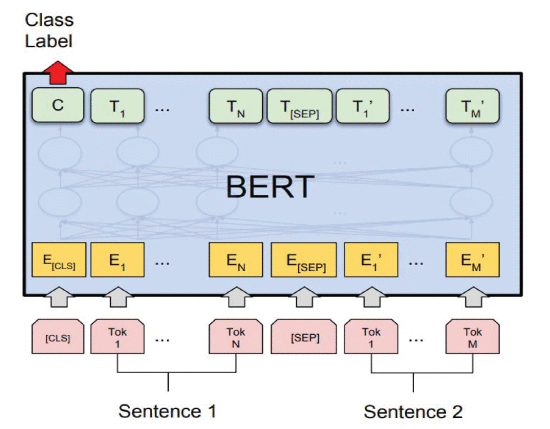

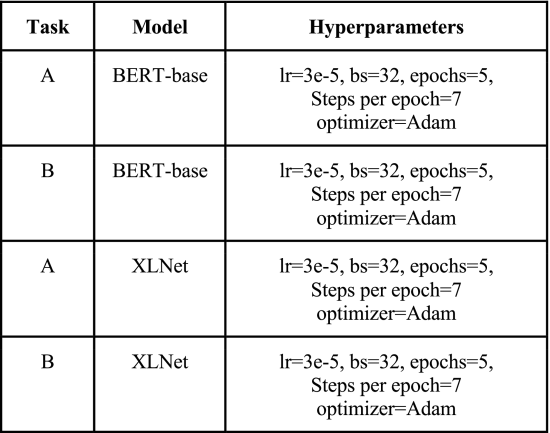

BERT는 Transformer 인코더 스택과 NLP의 semi-supervised sequence learning 접근 방식을 기반으로 구축되었습니다. 문장을 입력으로 받아 문장 내 단어 간의 맥락적 관계를 이해한 다음, 마스크가 문장에서 단어를 무작위로 선택하고 주변 단어를 기반으로 맥락을 예측하는 주의 메커니즘의 개념이 사용됩니다. Bert에는 Base 및 Large의 두 가지 모델 크기가 있습니다. 기본 모델에는 12개의 변압기 블록이 있는 반면 대형 모델에는 24개의 변압기 블록이 있습니다. 각 변환기 블록에는 각각 768 및 1024개의 피드포워드 히든 레이어 유닛이 있고 어텐션 레이어는 각각 12 및 16 유닛이 있습니다.

두 문제 작업에 대해 HuggingFace 라이브러리의 도움으로 Bert 기반 모델의 Tensorflow 기반 구현을 사용하고 데이터 세트에서 모델을 미세 조정했습니다.

아래 표는 BERT 기반 및 XLNet 모델의 미세 조정을 위해 선택된 하이퍼파라미터를 보여줍니다.

C. XLNet
XLNet[13]은 Transformer-XL 위에 구축된 일반화된 자동 회귀 언어 모델입니다. Transformer-XL은 장기 종속성을 캡처하고 더 긴 문장에서 컨텍스트 단편화를 방지하는 반복 메커니즘을 사용합니다. 또한 현재 단어에서 컨텍스트의 상대 거리가 각 주의 모듈에서 연속적으로 인코딩되도록 변환기 아키텍처에 대한 상대 위치 인코딩을 구현합니다. 문장의 양방향 컨텍스트를 캡처하기 위해 XLNet은 문장에서 단어의 가능한 모든 순열을 기반으로 토큰이 예측되는 순열 언어 모델링을 사용합니다. PLM의 주요 목적은 문장의 모든 단어에 대해 대상 토큰 단어의 로그 가능성을 최대화하는 것입니다. 따라서 Bert와 비교하여 XLNet에서 컨텍스트를 캡처하기 위해 마스크가 필요하지 않습니다.

우리는 XLNet 모델을 구현하기 위해 HuggingFace 라이브러리를 사용했고 데이터 세트에서 모델을 미세 조정했습니다. 표 [1] 은 두 분류 작업에 대해 XLNet 모델을 미세 조정하기 위해 우리가 선택한 hypeiparameters를 나타냅니다.

# EVALUATION

이 섹션에서는 SemEva1-2018 작업 3: 영어 트윗 챌린지에서 아이러니 감지에 의해 제공되는 데이터 세트에 대한 자세한 개요가 제공됩니다. 그런 다음 모델의 성능을 평가하는 데 사용되는 다양한 메트릭을 제시합니다. 이 섹션은 마지막으로 사용된 여러 하이퍼파라미터와 얻은 작업 결과에 대한 세부 정보로 끝납니다.

A. 하위 작업 A에 대한 데이터 세트
그림 2 는 하위 작업 A에 대한 데이터 세트 구성의 그림 표현을 제공합니다. 이 하위 작업에 대한 교육 데이터에는 3817개의 영어 트윗이 포함되어 있습니다. 이 3817개의 트윗 중 1901개가 아이러니하고 1916개가 아이러니하지 않습니다. 테스트 세트는 784개의 트윗으로 구성됩니다(311개의 아이러니한 트윗과 473개의 아이러니하지 않은 트윗).

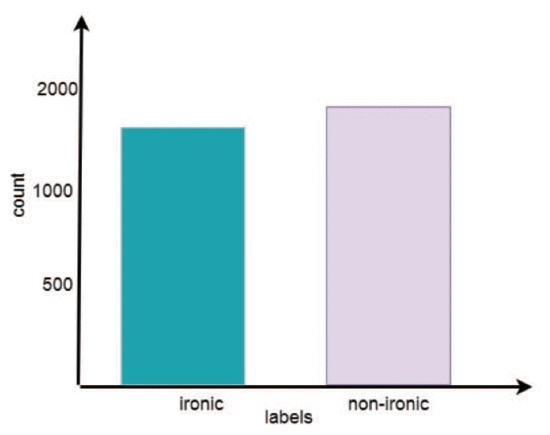

B. 하위 작업 B에 대한 데이터 세트
그림 3 은 하위 작업 B에 대한 훈련 말뭉치의 다양한 유형의 아이러니 분포를 보여줍니다.

총 3817개의 트윗이 있습니다. 정확한 구성은 표 II 와 같습니다 .

테스트 세트에는 784개의 샘플이 포함되어 있습니다(473개의 비아이러닉, 164개의 극성 대비 아이러니, 85개의 상황 아이러니 및 62개의 극성 대비 없는 아이러닉).

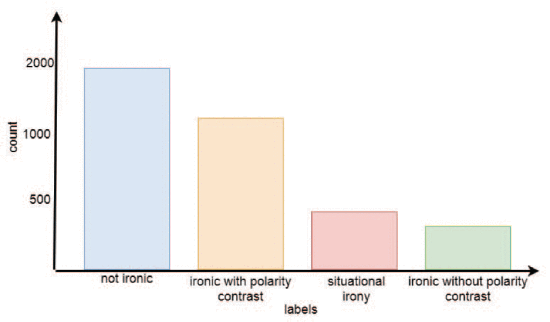

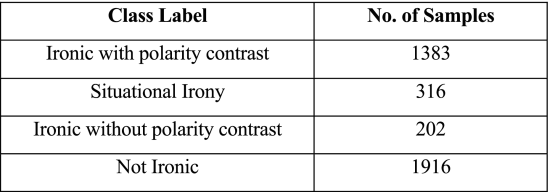

C. 평가 지표
이 SemEval 챌린지를 위해 선택한 평가 지표는 정확도, 정밀도, 재현율 및 F1 점수였습니다. 다른 모델의 성능은 F1 점수를 사용하여 비교됩니다.

측정항목은 다음과 같이 계산됩니다.

#RESULT

표 III 는 BERT와 XLNet을 이용하여 아이러니한 트윗과 아이러니하지 않은 트윗을 바이너리 분류한 Task A의 결과를 보여준다. 우리는 XLNet 모델이 BERT 모델보다 성능이 우수하고 작업 A에 대한 최신 결과를 능가한다는 것을 발견했습니다.

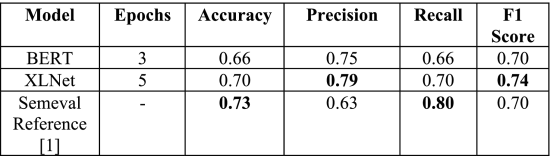

표 IV 는 트윗에서 다양한 유형의 아이러니를 다중 분류한 Task B의 결과를 보여준다 . 우리는 BERT 모델이 다중 클래스 문제에 대해 XLNet보다 더 잘 수행되었으며 SemEval 작업 3에서 얻은 최신 결과와 비교할 수 있음을 발견했습니다.

표 IV 는 각 하위 클래스에 대한 F1 점수를 보여줍니다. 표 V 는 두 Transformer 모델에 대한 모든 메트릭의 상세한 가중 평균 점수를 보여줍니다.

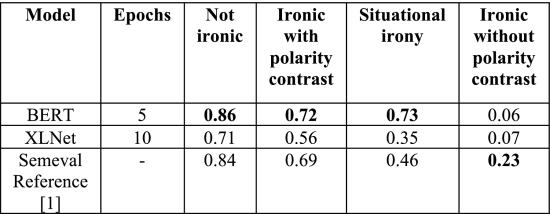

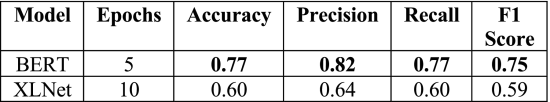

# CONCLUTION

이 논문에서는 영어 트윗에서 아이러니를 감지하는 SemEva1-2018의 태스크 3에 대한 변환기 기반 솔루션을 제안했습니다. 우리는 BERT와 XLNet을 사용하여 트윗에 있는 단어의 컨텍스트를 더 정확하게 이해하고 이러한 모델을 아이러니 감지 및 분류에 사용하는 데 성공했습니다. 앞으로 아이러니한 트윗에 대한 이해를 높일 수 있도록 트윗의 감성적인 측면을 통합하는 이모티콘을 포함할 계획입니다. 샘플링 기술을 사용하여 다중 클래스 분류 모델을 더욱 개선할 수도 있습니다. 또한 결과를 개선하기 위해 현재 BERT 기본 모델을 사용하는 대신 더 많은 수의 은닉 및 주의 계층을 갖는 BERT 대형 모델을 사용할 계획입니다.